# SmS_Spam_Classifier

- 1 Data Cleaning
- 2 EDA
- 3 Text Preprocessing
- 4 Model building
- 5 Evaluatin
- 6 Improement
- 7 Website
- 8 deploye

## importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 1. Data Cleaning

In [2]:
df = pd.read_csv('data/sms.csv')

In [3]:
df.head()

,Label,Message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Label       5572 non-null   object
 1   Message     5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.shape

(5572, 5)

In [6]:
#drop last 3 columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [7]:
df.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
#renmae the columns
df.rename(columns={'Label': 'target', 'Message': 'text'},inplace=True)
df.sample(5)

,target,text
5215,ham,I keep ten rs in my shelf:) buy two egg.
1771,ham,Watching tv now. I got new job :)
5201,spam,YOU VE WON! Your 4* Costa Del Sol Holiday or �...
5344,ham,When you guys planning on coming over?
1867,ham,Mmmm ... Fuck ... Not fair ! You know my weakn...


In [9]:
#we need numbers at place of target col, so will do encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['target'] = encoder.fit_transform(df['target'])

In [11]:
df.sample(5)

,target,text
613,0,THANX4 TODAY CER IT WAS NICE 2 CATCH UP BUT WE...
4124,0,May b approve panalam...but it should have mor...
3815,0,How long does it take to get it.
930,0,I'm really sorry i won't b able 2 do this frid...
3426,0,Haha okay... Today weekend leh...


In [12]:
df.isna().sum()

target    0
text      0
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(403)

In [14]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [15]:
df.shape

(5169, 2)

In [16]:
df.reset_index(drop=True, inplace=True)
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df.dtypes

target     int64
text      object
dtype: object

In [18]:
df.describe()

,target
count,5169.000000
mean,0.126330
std,0.332253
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


## 2. EDA : Exploratry Data Analysis

In [19]:
#let's check data imbalanced or not
df.target.value_counts()

target
0    4516
1     653
Name: count, dtype: int64

### we can see , data is imbalaced

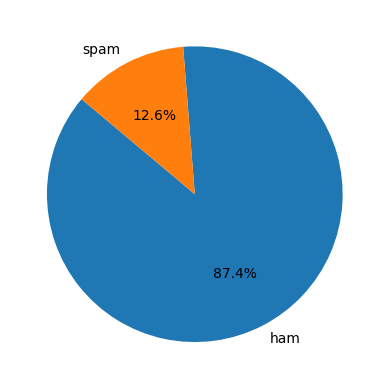

In [20]:
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%1.1f%%', startangle=140)
plt.show()

befor handle data is imbalace will check how many word , sentences ,etc.. are used in our data

In [21]:
#lets import nltk : natural language tool kit
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aakil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
#lets find num of character 
df['num_characters'] = df.text.apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
#lets find num of words
from nltk.tokenize import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()
df['num_words'] = df['text'].apply(lambda x: len(tokenizer.tokenize(x)))

In [24]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,23
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,36
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [25]:
#num of sentences
from nltk.tokenize import PunktSentenceTokenizer

sent_tokenizer = PunktSentenceTokenizer()
df['num_sentences'] = df['text'].apply(lambda x: len(sent_tokenizer.tokenize(x)))


In [26]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,1
1,0,Ok lar... Joking wif u oni...,29,8,1
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,36,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.924163,17.695299,1.920681
std,58.175349,12.672457,1.429556
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,14.000000,1.000000
75%,117.000000,25.000000,2.000000
max,910.000000,214.000000,38.000000


In [28]:
#ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.457263,16.452613,1.767715
std,56.357463,12.858450,1.353829
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,21.000000,2.000000
max,910.000000,214.000000,38.000000


In [29]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.479326,26.289433,2.978560
std,30.014336,6.579189,1.491129
min,13.000000,2.000000,1.000000
25%,131.000000,24.000000,2.000000
50%,148.000000,28.000000,3.000000
75%,157.000000,30.000000,4.000000
max,223.000000,41.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

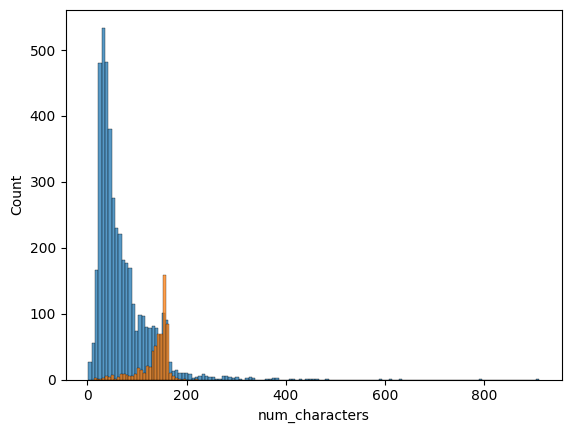

In [30]:
#lets check using plot
sns.histplot(df[df['target'] == 0]['num_characters'])
#lets check using plot
sns.histplot(df[df['target'] == 1]['num_characters'])

### we can see spam msg has , num of characters is very low compaires ham messages

<Axes: xlabel='num_words', ylabel='Count'>

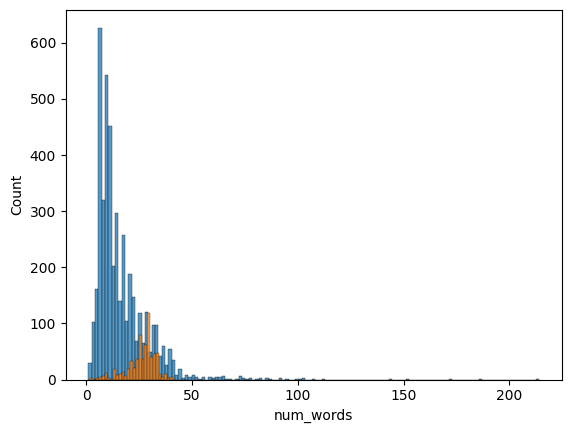

In [31]:
#let's see in num or words
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'])

<Axes: xlabel='num_sentences', ylabel='Count'>

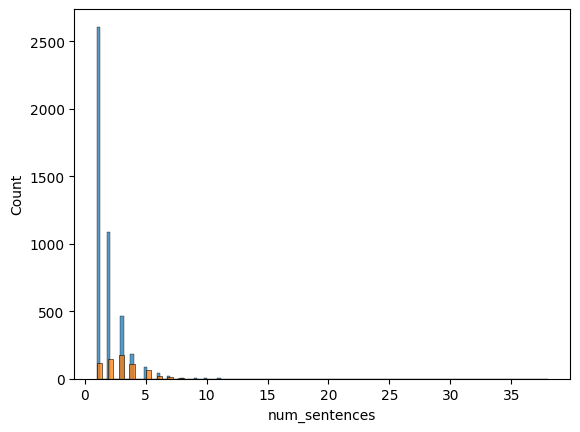

In [32]:
#let's see in num or sentences
sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'])

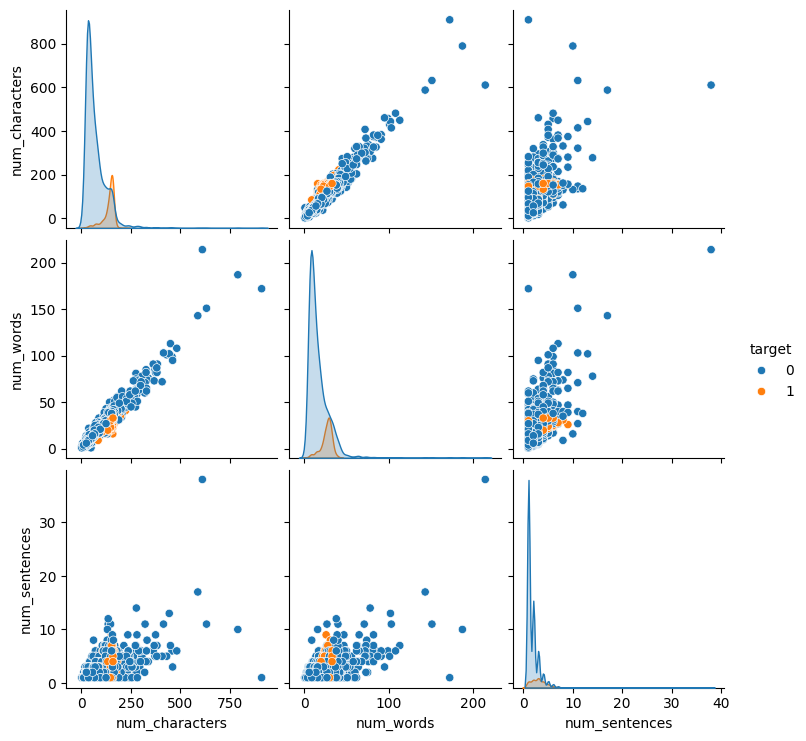

In [33]:
#let's check relation
sns.pairplot(df, hue='target')

we can see in data, there is outlier will handle it latter

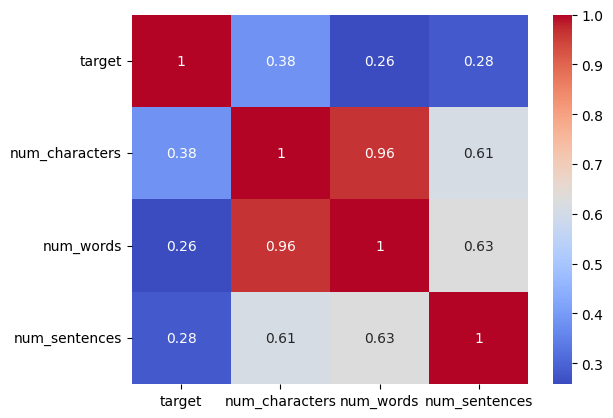

In [34]:
#lets check using correlation
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

#above we can see in data there is multicolinearity , os with target we can chose only one column that will be num of chararter bcz there no mulcolineartiy

## 3. Data Preprocessing
    - Lower case
    - Tokenization
    - Removing special characters
    - Removing  stop words and punctuation
    - Stemming

In [35]:
#Data Preprocessing

from nltk.tokenize import TreebankWordTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

tokenizer = TreebankWordTokenizer()
ps = PorterStemmer()

def transform_text(text):
    #convert into string
    # df['text'] = df['text'].apply(lambda x: " ".join(str(i) for i in x) if not isinstance(x, str) else x)

    
    #Conveting in lower case
    text = text.lower()
    
    #tokenization
    text = tokenizer.tokenize(text)
    
    #Removing special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    #Removing  stop words and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    #Stemming
    for i in text:
        y.append(ps.stem(i))
        
    return y

In [36]:
transform_text("Hello World, I am Aakil Tayyab From Jamia Millia Islamia?, loving, acting")

['hello',
 'world',
 'aakil',
 'tayyab',
 'jamia',
 'millia',
 'islamia',
 'love',
 'act']

In [37]:
df['transformed_text'] = df['text'].apply(transform_text)

In [38]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,1,"[go, jurong, point, avail, bugi, n, great, wor..."
1,0,Ok lar... Joking wif u oni...,29,8,1,"[ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,36,2,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, think, goe, usf, live, around, though]"


In [39]:
#word cloud
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [40]:
# Step 1: Convert token lists to strings
df['joined_text'] = df['transformed_text'].apply(lambda x: " ".join(x) if isinstance(x, list) else str(x))

# Step 2: Generate word cloud for spam messages
spam_wc = wc.generate(df[df['target'] == 1]['joined_text'].str.cat(sep=" "))


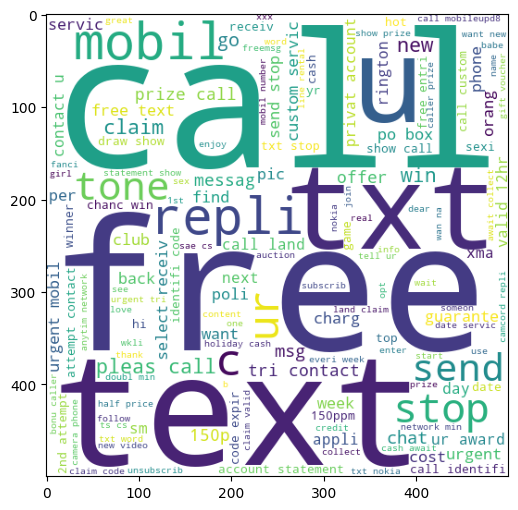

In [41]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [42]:
# Step 1: Convert token lists to strings
df['joined_text'] = df['transformed_text'].apply(lambda x: " ".join(x) if isinstance(x, list) else str(x))

# Step 2: Generate word cloud for spam messages
ham_wc = wc.generate(df[df['target'] == 0]['joined_text'].str.cat(sep=" "))

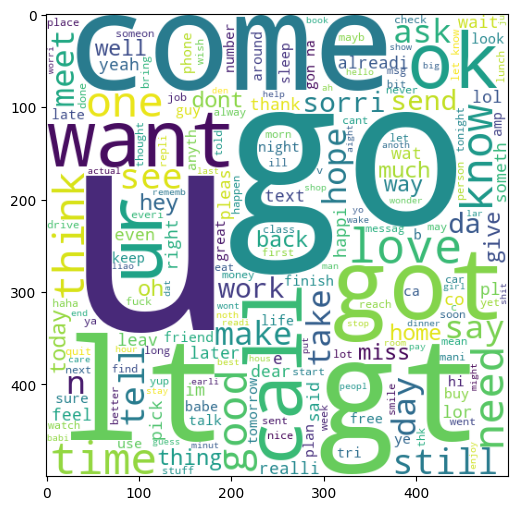

In [43]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [44]:
#for spam
spam = []
for msg in df[df['target'] == 1]['transformed_text']:
    for word in msg: 
        spam.append(word)

In [45]:
from collections import Counter
pd.DataFrame(Counter(spam).most_common(30))

,0,1
0,call,316
1,free,179
2,2,155
3,txt,139
4,text,120
5,u,119
6,ur,119
7,mobil,111
8,repli,103
9,claim,95


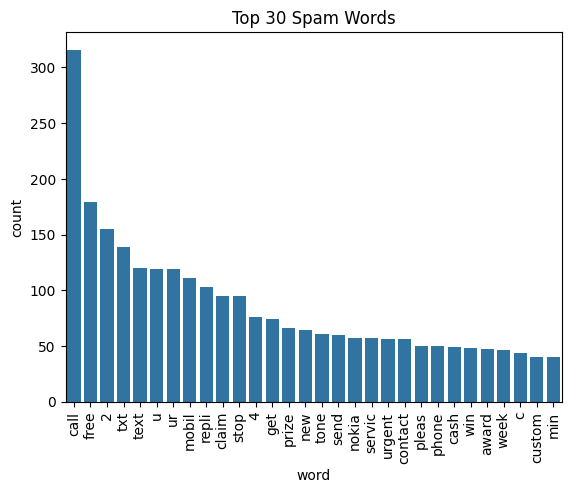

In [46]:
# Top 30 words
top_words = Counter(spam).most_common(30)
df_top = pd.DataFrame(top_words, columns=['word', 'count'])

# Correct barplot syntax
sns.barplot(x='word', y='count', data=df_top)
plt.xticks(rotation='vertical')
plt.title('Top 30 Spam Words')
plt.show()

In [47]:
#for ham
ham = []
for msg in df[df['target'] == 0]['transformed_text']:
    for word in msg: 
        ham.append(word)

In [48]:
from collections import Counter
pd.DataFrame(Counter(ham).most_common(30))

,0,1
0,u,871
1,go,397
2,get,347
3,gt,288
4,lt,287
5,2,284
6,come,270
7,got,236
8,like,232
9,know,228


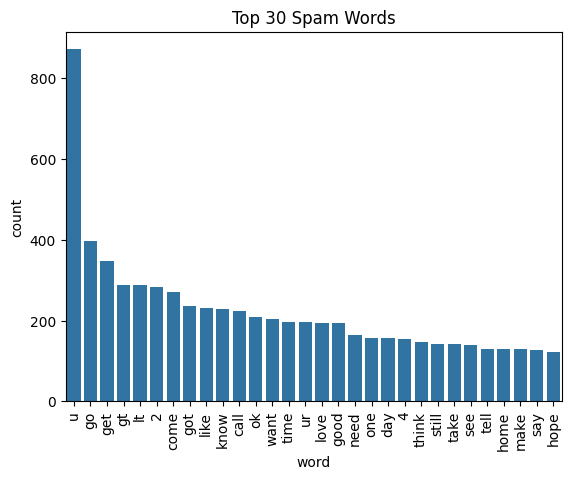

In [49]:
# Top 30 words
top_words = Counter(ham).most_common(30)
df_top = pd.DataFrame(top_words, columns=['word', 'count'])

# Correct barplot syntax
sns.barplot(x='word', y='count', data=df_top)
plt.xticks(rotation='vertical')
plt.title('Top 30 Spam Words')
plt.show()

## 4. Model Building

We know that we have target variable in numerical now we need to text data in numerical so we will use verctoriz

In [50]:
#let's convert text data into vectors
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [51]:
df['joined_text'] = df['transformed_text'].apply(lambda x: ' '.join(x))
X = tfidf.fit_transform(df['joined_text']).toarray()

In [52]:
X.shape

(5169, 3000)

In [53]:
y = df['target'].values

In [54]:
y.shape

(5169,)

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [56]:
X_train.shape

(4135, 3000)

In [57]:
y_train.shape

(4135,)

In [58]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [73]:
gnb.fit(X_train, y_train)
mng_final = mnb.fit(X_train, y_train)
bnb.fit(X_train, y_train)

BernoulliNB()

In [60]:
y_pred_gnb = gnb.predict(X_test)
y_pred_mnb = mnb.predict(X_test)
y_pred_bnb = bnb.predict(X_test)

In [61]:
print("GaussianNb")
print(accuracy_score(y_test, y_pred_gnb))
print(confusion_matrix(y_test, y_pred_gnb))
print(precision_score(y_test, y_pred_gnb))
print("--------------------------------------------------------------------------")

print("MultinomialNb")
print(accuracy_score(y_test, y_pred_mnb))
print(confusion_matrix(y_test, y_pred_mnb))
print(precision_score(y_test, y_pred_mnb))
print("--------------------------------------------------------------------------")

print("BernoulliNb")
print(accuracy_score(y_test, y_pred_bnb))
print(confusion_matrix(y_test, y_pred_bnb))
print(precision_score(y_test, y_pred_bnb))
print("--------------------------------------------------------------------------")

GaussianNb
0.8549323017408124
[[772 124]
 [ 26 112]]
0.4745762711864407
--------------------------------------------------------------------------
MultinomialNb
0.9700193423597679
[[896   0]
 [ 31 107]]
1.0
--------------------------------------------------------------------------
BernoulliNb
0.9787234042553191
[[895   1]
 [ 21 117]]
0.9915254237288136
--------------------------------------------------------------------------


##### we can se above multinomialNb perform well in textual data , accuracy is not more import but precesion accuracy is important , and precision is : 1 so wil processed with multinomialNb

In [62]:
#Let's check other alogrithm
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [63]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [64]:
clfs = {
    'SVC': svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
}

In [65]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return accuracy, precision

In [66]:
# accuracy_scores = []
# precision_scores = []

# for name, clf in clfs.items():
#     current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    
#     accuracy_scores.append(current_accuracy)
#     precision_scores.append(current_precision)

In [67]:
# performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy' : accuracy_scores, 'Precision' : precision_scores}).sort_values('Precision', ascending=True)

## Model Improve
- 1. Change the max_features parameters of TFIDF after changing we got best result so now will processed with this

# #.Final Model 

In [76]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mng_final, open('model.pkl', 'wb'))

## #lets check model working or not ?

In [77]:

loaded_vectorizer = pickle.load(open('vectorizer.pkl', 'rb'))
loaded_model = pickle.load(open('model.pkl', 'rb'))

In [78]:
print(hasattr(loaded_model, "classes_"))  # Should be True if fitted


True


In [91]:
testing_msg = [
    "Hey bro, kal ka plan confirm hai kya?",                      # Ham
    "Congratulations! You've won ₹50,000. Click here to claim.",  # Spam
    "Papa ne bola 5 baje ghar aa jana.",                          # Ham
    "Get free recharge worth ₹100 instantly. Limited offer!",     # Spam
    "Can you send me the notes from today's class?",              # Ham
    "Your account has been suspended. Verify now: http://fakebank.in",  # Spam
    "Let's meet at CCD around 6 PM.",                             # Ham
    "Win a brand new iPhone 15. Register at luckywinner.in",      # Spam
    "Happy birthday! Have a great year ahead.",                   # Ham
    "Claim your free holiday package now. Visit travelmagic.in",  # Spam
]

# Preprocess each message
transformed = [" ".join(transform_text(msg)) for msg in testing_msg]

# Vectorize
vectorized = loaded_vectorizer.transform(transformed)

# Predict
predictions = loaded_model.predict(vectorized)

# Display
for msg, label in zip(testing_msg, predictions):
    print(f"{msg} → {'Spam' if label == 1 else 'Ham'}")


Hey bro, kal ka plan confirm hai kya? → Ham
Congratulations! You've won ₹50,000. Click here to claim. → Spam
Papa ne bola 5 baje ghar aa jana. → Ham
Get free recharge worth ₹100 instantly. Limited offer! → Ham
Can you send me the notes from today's class? → Ham
Your account has been suspended. Verify now: http://fakebank.in → Spam
Let's meet at CCD around 6 PM. → Ham
Win a brand new iPhone 15. Register at luckywinner.in → Spam
Happy birthday! Have a great year ahead. → Ham
Claim your free holiday package now. Visit travelmagic.in → Spam
